In [1]:
from keras.layers import average, concatenate,RepeatVector,Lambda,add,subtract,Activation
from keras.models import Input, Model
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D,AveragePooling1D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
from sklearn import metrics as mt
import pandas as pd
import numpy as np
import cv2
import os
from os.path import join as pjoin
from matplotlib import pyplot as plt
import random
import warnings
import keras
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D,AveragePooling1D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [6]:
# the model we will use
def make_model_1d(l2_lambda,clip_lenth,dimension):

    input_holder = Input(shape=(clip_lenth, dimension))
    

    x = Dense(32, 
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
            )(input_holder)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x) 
    
    x = Dense(16, 
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
            )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x) 

    x = Dense(8, 
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
            )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x) 
    
    x= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform', name='preds'
#              kernel_regularizer=l2(l2_lambda)
             )(x)
    
    def operation(inputs):
        m=inputs
        result = K.sum(m,axis=1)
        return result

    Z=Lambda(operation)(x)
#     print(x.shape)
    model = Model(inputs=input_holder,outputs=Z)
    model.compile(loss='mean_squared_error', # 'categorical_crossentropy' 'mean_squared_error' 'mean_absolute_percentage_error'
              optimizer='adam') # 'adadelta' 'rmsprop'
    
    model.summary()    
    return model
te=make_model_1d(0.001,500,50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 500, 50)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 500, 32)           1632      
_________________________________________________________________
batch_normalization_4 (Batch (None, 500, 32)           128       
_________________________________________________________________
activation_4 (Activation)    (None, 500, 32)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 500, 16)           528       
_________________________________________________________________
batch_normalization_5 (Batch (None, 500, 16)           64        
__________

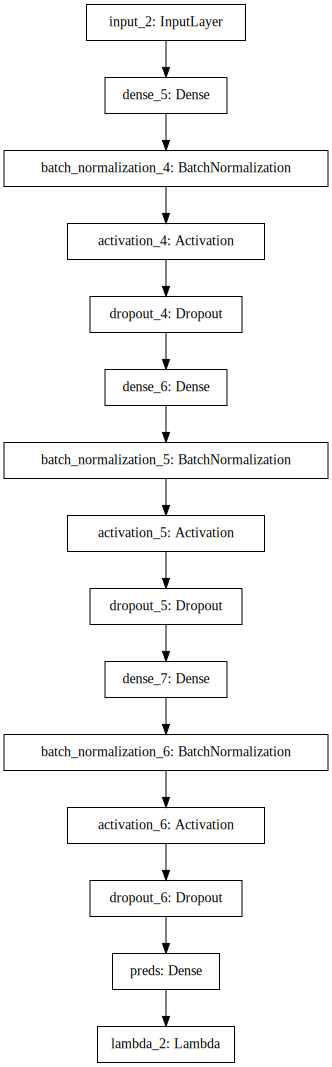

In [7]:
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(te).create(prog='dot', format='svg'))

In [8]:
X_train=np.random.rand(1000,500,50)
Y_train=np.random.rand(1000,1)

In [9]:
te_h=te.fit(X_train, Y_train, epochs=4, batch_size=64, verbose=1  )

Epoch 1/4
1000/1000 [==============================] - 2s 2ms/step - loss: 103675.3594
Epoch 2/4
1000/1000 [==============================] - 0s 191us/step - loss: 94658.8469
Epoch 3/4
1000/1000 [==============================] - 0s 190us/step - loss: 85718.8907
Epoch 4/4
1000/1000 [==============================] - 0s 194us/step - loss: 77503.3020


In [20]:
X_test=np.random.rand(2,500,50)

In [21]:
layer_name = 'preds'
intermediate_layer_model = Model(inputs=te.input,
                                 outputs=te.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_test)

In [22]:
intermediate_output.shape

(2, 500, 1)

In [25]:
intermediate_output[0]

array([[0.45684156],
       [0.58314735],
       [0.53994244],
       [0.42769143],
       [0.5946492 ],
       [0.81895393],
       [0.5353812 ],
       [0.47881025],
       [0.6204194 ],
       [0.94172454],
       [0.82887375],
       [0.6648633 ],
       [0.3839878 ],
       [0.6593372 ],
       [0.44298702],
       [0.86930776],
       [0.7568334 ],
       [0.48863202],
       [0.9141004 ],
       [0.68113494],
       [0.45717698],
       [0.724287  ],
       [0.43498838],
       [0.61334777],
       [0.63562006],
       [0.617149  ],
       [0.70198685],
       [0.5953231 ],
       [0.4686212 ],
       [0.588573  ],
       [0.42509103],
       [0.44901156],
       [0.740797  ],
       [0.70905674],
       [0.8583392 ],
       [0.95740956],
       [0.67852455],
       [0.77430785],
       [0.9742183 ],
       [0.97324216],
       [0.70354027],
       [0.47345352],
       [0.4533024 ],
       [0.42639774],
       [0.3956913 ],
       [0.4327114 ],
       [0.41714197],
       [0.595